In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

num_experiments = 81
num_machines = 9
baseline = [{} for _ in range(num_experiments)]
planned = [{} for _ in range(num_experiments)]

# Baseline

In [2]:
for experiment in range(num_experiments):
    for machine in range(1, num_machines):
        with open(f"../results/les-{machine:02d}/baseline/log/experiment09_trial{experiment:02d}.log", 'r') as rf:
            trial_data = [line for line in rf.readlines() if "simulation closed" in line]
        if len(trial_data) > 1:
            continue
        trial_data = trial_data[0].split(',')
        trial_type = trial_data[3]
        trial_time = float(trial_data[4].split('=')[1])
        try:
            baseline[experiment][trial_type].append(trial_time)
        except KeyError:
            baseline[experiment][trial_type] = [trial_time]

In [3]:
baseline_df = pd.DataFrame.from_dict(baseline)
baseline_df

,reach-target,failure-bt,timeout
0,"[594.6441259384155, 456.4652817249298, 453.466...",[286.2836289405823],NaN
1,"[483.50702691078186, 477.5094356536865, 492.51...",NaN,[900.8084681034088]
2,"[475.4966151714325, 471.49973797798157, 503.67...","[358.5041229724884, 364.3977618217468]",[900.9770939350128]
3,"[477.4974570274353, 494.51962661743164, 527.60...",NaN,"[900.812949180603, 900.0175504684448]"
4,"[494.522664308548, 491.51313519477844, 491.514...",NaN,[900.9775514602661]
...,...,...,...
76,NaN,"[284.2824466228485, 283.2823452949524, 285.281...",NaN
77,"[389.3926291465759, 390.4069173336029, 385.398...","[445.46034479141235, 274.2712743282318]",NaN
78,NaN,"[214.22165775299072, 214.2113869190216, 267.27...",NaN
79,NaN,"[227.22210836410522, 220.2215666770935, 265.25...",NaN


# Planned

In [4]:
for experiment in range(num_experiments):
    for machine in range(1, num_machines):
        with open(f"../results/les-{machine:02d}/planned/log/experiment09_trial{experiment:02d}.log", 'r') as rf:
            trial_data = [line for line in rf.readlines() if "simulation closed" in line]
        if len(trial_data) > 1:
            continue
        trial_data = trial_data[0].split(',')
        trial_type = trial_data[3]
        trial_time = float(trial_data[4].split('=')[1])
        try:
            planned[experiment][trial_type].append(trial_time)
        except KeyError:
            planned[experiment][trial_type] = [trial_time]

In [5]:
planned_df = pd.DataFrame.from_dict(planned)
planned_df

,timeout,reach-target,failure-bt
0,"[900.9851219654083, 900.9765274524689, 900.968...",[529.5630843639374],NaN
1,"[900.8157751560211, 900.8290774822235, 900.809...","[619.6467237472534, 649.7001516819, 640.689006...",NaN
2,[900.7967076301575],"[456.47171330451965, 480.50714325904846, 562.5...",NaN
3,NaN,"[670.7036821842194, 648.6851787567139, 664.707...",NaN
4,[900.8073720932007],"[672.6997034549713, 660.7244446277618, 688.728...",[645.6745505332947]
...,...,...,...
76,NaN,"[616.6745257377625, 680.7301850318909, 609.648...",[588.6202619075775]
77,NaN,"[350.3708016872406, 326.34228134155273, 333.34...",NaN
78,NaN,"[700.743489742279, 779.8589324951172, 727.7887...",NaN
79,"[900.9695327281952, 900.9847676753998, 900.988...",NaN,NaN


# Statistics

## Number of each event
i.e. how many times did the simulation achieve each status

In [6]:
baseline_nums = [{col: None for col in baseline_df} for _ in range(num_experiments)]
for col in baseline_df:
    for i in range(num_experiments):
        try:
            baseline_nums[i][col] = len(baseline_df.loc[i][col])
        except TypeError:
            baseline_nums[i][col] = 0

In [7]:
baseline_nums = pd.DataFrame(baseline_nums)
baseline_nums

,reach-target,failure-bt,timeout
0,6,1,0
1,7,0,1
2,5,2,1
3,6,0,2
4,7,0,1
...,...,...,...
76,0,8,0
77,6,2,0
78,0,8,0
79,0,8,0


In [32]:
planned_nums = [{col: None for col in planned_df} for _ in range(num_experiments)]
for col in planned_df:
    for i in range(num_experiments):
        try:
            planned_nums[i][col] = len(planned_df.loc[i][col])
        except TypeError:
            planned_nums[i][col] = 0

In [33]:
planned_nums = pd.DataFrame(planned_nums)
planned_nums.columns = pd.CategoricalIndex(["reach-target", "failure-bt", "timeout"])
planned_nums

,reach-target,failure-bt,timeout
0,7,1,0
1,3,5,0
2,1,7,0
3,0,8,0
4,1,6,1
...,...,...,...
76,0,7,1
77,0,8,0
78,0,8,0
79,8,0,0


## Averages

In [10]:
baseline_avg = [{col: None for col in baseline_df} for _ in range(num_experiments)]
for col in baseline_df:
    for i in range(num_experiments):
        try:
            baseline_avg[i][col] = np.mean(baseline_df.loc[i][col])
        except TypeError:
            baseline_avg[i][col] = 0

In [11]:
baseline_avg = pd.DataFrame(baseline_avg)
baseline_avg

,reach-target,failure-bt,timeout
0,502.730847,286.283629,NaN
1,497.725447,NaN,900.808468
2,483.934611,361.450942,900.977094
3,483.008995,NaN,900.415250
4,497.666558,NaN,900.977551
...,...,...,...
76,NaN,292.922706,NaN
77,390.242925,359.865810,NaN
78,NaN,234.617651,NaN
79,NaN,230.479116,NaN


In [12]:
planned_avg = [{col: None for col in baseline_df} for _ in range(num_experiments)]
for col in planned_df:
    for i in range(num_experiments):
        try:
            planned_avg[i][col] = np.mean(planned_df.loc[i][col])
        except TypeError:
            planned_avg[i][col] = 0

In [13]:
planned_avg = pd.DataFrame(planned_avg)
planned_avg

,reach-target,failure-bt,timeout
0,529.563084,NaN,900.702881
1,648.295044,NaN,900.818014
2,538.988873,NaN,900.796708
3,677.969665,NaN,NaN
4,667.376125,645.674551,900.807372
...,...,...,...
76,639.541574,588.620262,NaN
77,330.214427,NaN,NaN
78,745.175927,NaN,NaN
79,NaN,NaN,900.979476


## STD

In [14]:
baseline_std = [{col: None for col in baseline_df} for _ in range(num_experiments)]
for col in baseline_df:
    for i in range(num_experiments):
        try:
            baseline_std[i][col] = np.std(baseline_df.loc[i][col])
        except TypeError:
            baseline_std[i][col] = 0

In [15]:
baseline_std = pd.DataFrame(baseline_std)
baseline_std

,reach-target,failure-bt,timeout
0,60.608973,0.000000,NaN
1,21.418600,NaN,0.000000
2,12.480409,2.946819,0.000000
3,22.709083,NaN,0.397699
4,9.204375,NaN,0.000000
...,...,...,...
76,NaN,18.539978,NaN
77,7.726718,85.594535,NaN
78,NaN,24.805381,NaN
79,NaN,13.601977,NaN


In [16]:
planned_std = [{col: None for col in baseline_df} for _ in range(num_experiments)]
for col in planned_df:
    for i in range(num_experiments):
        try:
            planned_std[i][col] = np.std(planned_df.loc[i][col])
        except TypeError:
            planned_std[i][col] = 0

In [17]:
planned_std = pd.DataFrame(planned_std)
planned_std

,reach-target,failure-bt,timeout
0,0.000000,NaN,0.436768
1,31.691624,NaN,0.008272
2,54.165264,NaN,0.000000
3,17.526353,NaN,NaN
4,43.804436,0.0,0.000000
...,...,...,...
76,29.927356,0.0,NaN
77,8.158424,NaN,NaN
78,42.078815,NaN,NaN
79,NaN,NaN,0.006187


# Plots

array([<AxesSubplot:title={'center':'reach-target'}>,
       <AxesSubplot:title={'center':'failure-bt'}>,
       <AxesSubplot:title={'center':'timeout'}>], dtype=object)

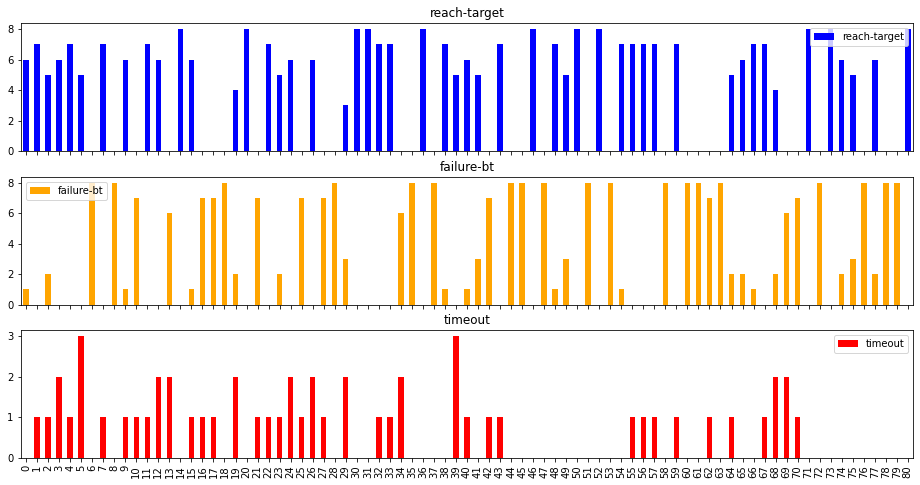

In [28]:
baseline_nums.plot.bar(subplots=True, figsize=(16, 8), color={"reach-target": "blue", "failure-bt": "orange", "timeout": "red"})

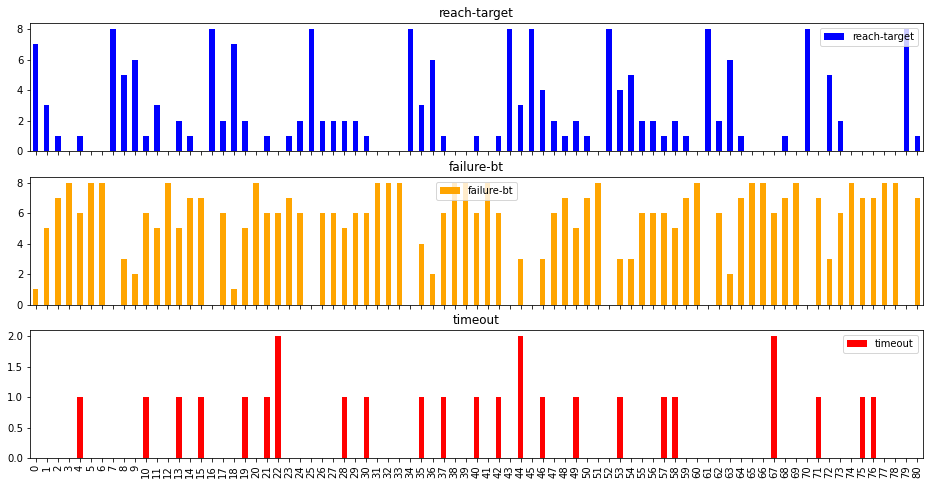

In [34]:
axes = planned_nums.plot.bar(subplots=True, figsize=(16, 8), color={"reach-target": "blue", "failure-bt": "orange", "timeout": "red"},)

## Successes per trial

In [35]:
suc = {"Planned Success": [x/8 for x in planned_nums["reach-target"]], 
       "Baseline Success": [x/8 for x in baseline_nums["reach-target"]]}
suc = pd.DataFrame(suc)
suc

,Planned Success,Baseline Success
0,0.875,0.750
1,0.375,0.875
2,0.125,0.625
3,0.000,0.750
4,0.125,0.875
...,...,...
76,0.000,0.000
77,0.000,0.750
78,0.000,0.000
79,1.000,0.000


<AxesSubplot:>

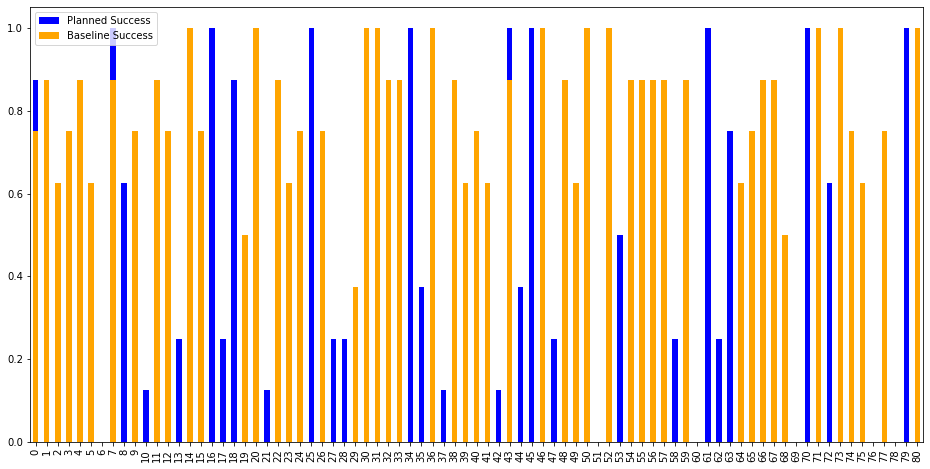

In [48]:
_, ax = plt.subplots()
suc["Planned Success"].plot.bar(stacked=True, figsize=(16, 8), ax=ax, color="blue", zorder=0, legend=True)
suc["Baseline Success"].plot.bar(stacked=True, figsize=(16, 8), ax=ax, color="orange", zorder=1, legend=True)

In [40]:
time = {"Planned Average Time": planned_avg["reach-target"], 
       "Baseline Average Time": baseline_avg["reach-target"]}
time = pd.DataFrame(time)
time

,Planned Average Time,Baseline Average Time
0,529.563084,502.730847
1,648.295044,497.725447
2,538.988873,483.934611
3,677.969665,483.008995
4,667.376125,497.666558
...,...,...
76,639.541574,NaN
77,330.214427,390.242925
78,745.175927,NaN
79,NaN,NaN


### Average time to reach target

<AxesSubplot:>

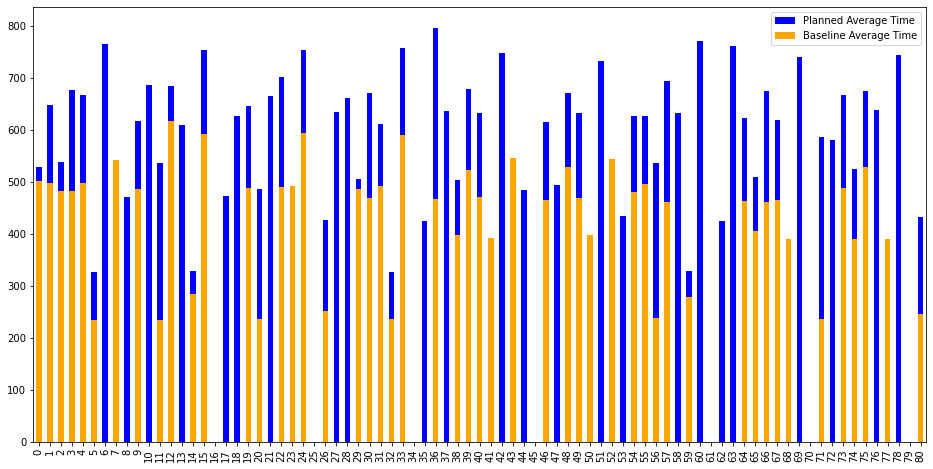

In [53]:
_, ax = plt.subplots()
time["Planned Average Time"].plot.bar(stacked=True, figsize=(16, 8), ax=ax, color="blue", legend=True)
time["Baseline Average Time"].plot.bar(stacked=True, figsize=(16, 8), ax=ax, color="orange", legend=True)